## Import the Liabraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


## Read the Data

In [51]:
# Now we need to read the data
df = pd.read_csv(r'/Users/serorl/Downloads/_AIDispatcher/Company Statement/3_EDAnalysis/_INPUT/DRIVERS_with_ID/driver_ID_performance.csv')

In [4]:
# Now let's take a look at the data

df.head()

,Driver ID,Avg Gross,Total Gross,Avg Profit/Loss,Total Profit/Loss,Avg Miles,Total Miles,Avg Work Days,Total Work Days,Avg Fuel Efficiency,Avg Driver Pay,Total Driver Pay,Performance Score,Performance Rank
0,driver_001,8546.250,34185.0,1708.1225,6832.49,3324.975,13299.90,6.50,26,0.4950,2327.4825,9309.93,3.084045,1
1,driver_002,5940.000,11880.0,656.1350,1312.27,2207.500,4415.00,5.00,10,0.5750,1545.2500,3090.50,2.988057,2
2,driver_003,9509.375,38037.5,1538.9650,6155.86,3796.250,15185.00,6.75,27,0.5425,2657.3750,10629.50,2.910330,3
3,driver_004,8200.000,8200.0,1641.5300,1641.53,3475.000,3475.00,6.00,6,0.3800,2432.5000,2432.50,2.832095,4
4,driver_005,6900.000,6900.0,923.6700,923.67,2923.960,2923.96,5.00,5,0.5300,1900.5700,1900.57,2.675710,5


## Inspecting and Cleaning the Data

In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Driver ID            51 non-null     object 
 1   Avg Gross            51 non-null     float64
 2   Total Gross          51 non-null     float64
 3   Avg Profit/Loss      51 non-null     float64
 4   Total Profit/Loss    51 non-null     float64
 5   Avg Miles            51 non-null     float64
 6   Total Miles          51 non-null     float64
 7   Avg Work Days        51 non-null     float64
 8   Total Work Days      51 non-null     int64  
 9   Avg Fuel Efficiency  51 non-null     float64
 10  Avg Driver Pay       51 non-null     float64
 11  Total Driver Pay     51 non-null     float64
 12  Performance Score    51 non-null     float64
 13  Performance Rank     51 non-null     int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 5.7+ KB
None


In [6]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Driver ID - 0%
Avg Gross - 0%
Total Gross - 0%
Avg Profit/Loss - 0%
Total Profit/Loss - 0%
Avg Miles - 0%
Total Miles - 0%
Avg Work Days - 0%
Total Work Days - 0%
Avg Fuel Efficiency - 0%
Avg Driver Pay - 0%
Total Driver Pay - 0%
Performance Score - 0%
Performance Rank - 0%


### Check for non-numeric values in numerical columns

In [199]:
numerical_cols = ['Avg Gross', 'Total Gross', 'Avg Profit/Loss', 'Total Profit/Loss', 'Avg Fuel Efficiency', 
                        'Avg Miles', 'Total Miles', 'Avg Work Days', 'Performance Score']
non_num = df[numerical_cols].map(lambda x: isinstance(x, (int, float))).all()
print('=== Numerical Values in Numerical Columns:')
print(non_num)

=== Numerical Values in Numerical Columns:
Avg Gross              True
Total Gross            True
Avg Profit/Loss        True
Total Profit/Loss      True
Avg Fuel Efficiency    True
Avg Miles              True
Total Miles            True
Avg Work Days          True
Performance Score      True
dtype: bool


## =========== Univariate Analysis ==========

### Are there any Outliers?

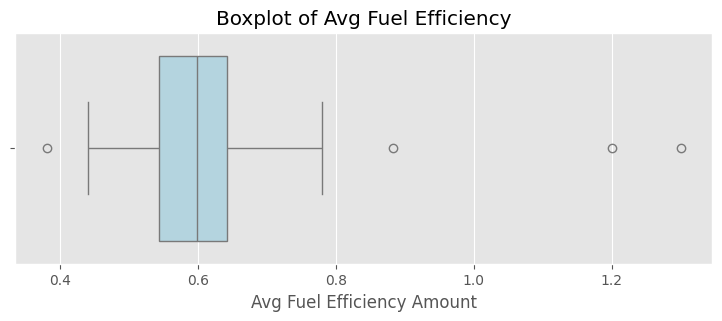

In [96]:
# Create a box plot for 'Avg Fuel Efficiency'
plt.figure(figsize=(9, 3))
sns.boxplot(x=df['Avg Fuel Efficiency'], color='lightblue')  # Creating a boxplot to identify outliers in Avg Fuel Efficiency
plt.title('Boxplot of Avg Fuel Efficiency')
plt.xlabel('Avg Fuel Efficiency Amount')
plt.show()

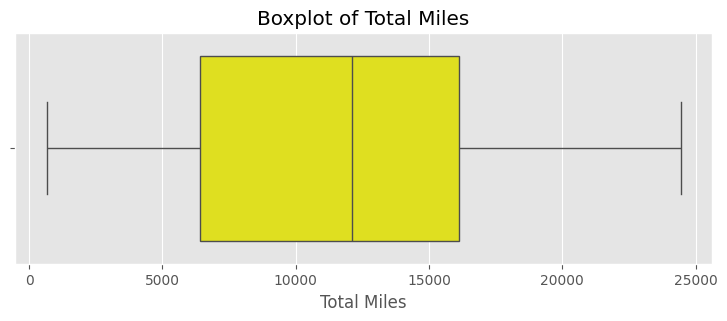

In [106]:
# Create a box plot for 'Total Miles'
plt.figure(figsize=(9, 3))
sns.boxplot(x=df['Total Miles'], color='yellow')  # Creating a boxplot to identify outliers in Total Miles
plt.title('Boxplot of Total Miles')
plt.xlabel('Total Miles')
plt.show()

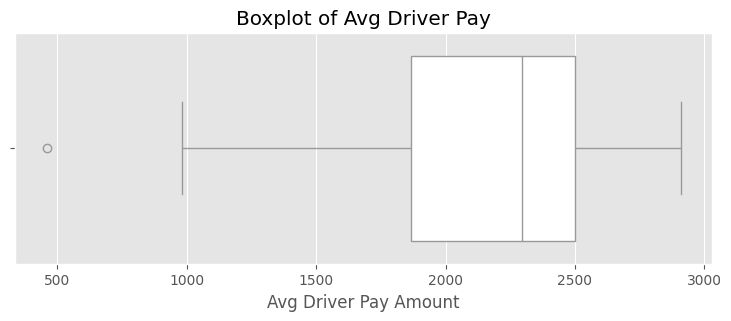

In [111]:
# Create a box plot for 'Avg Driver Pay'
plt.figure(figsize=(9, 3))
sns.boxplot(x=df['Avg Driver Pay'], color='white')  # Creating a boxplot to identify outliers in Avg Profit/Loss
plt.title('Boxplot of Avg Driver Pay')
plt.xlabel('Avg Driver Pay Amount')
plt.show()

### Boxplot of Avg Profit/Loss

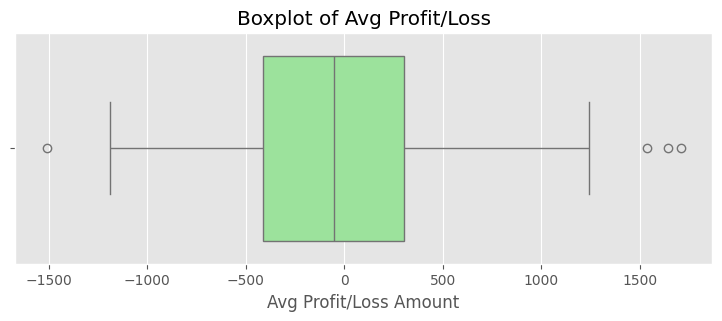

In [86]:
plt.figure(figsize=(9, 3))
sns.boxplot(x=df['Avg Profit/Loss'], color='lightgreen')  # Creating a boxplot to identify outliers in Avg Profit/Loss
plt.title('Boxplot of Avg Profit/Loss')
plt.xlabel('Avg Profit/Loss Amount')
plt.show()

#### Distribution of Avg Profit/Loss 

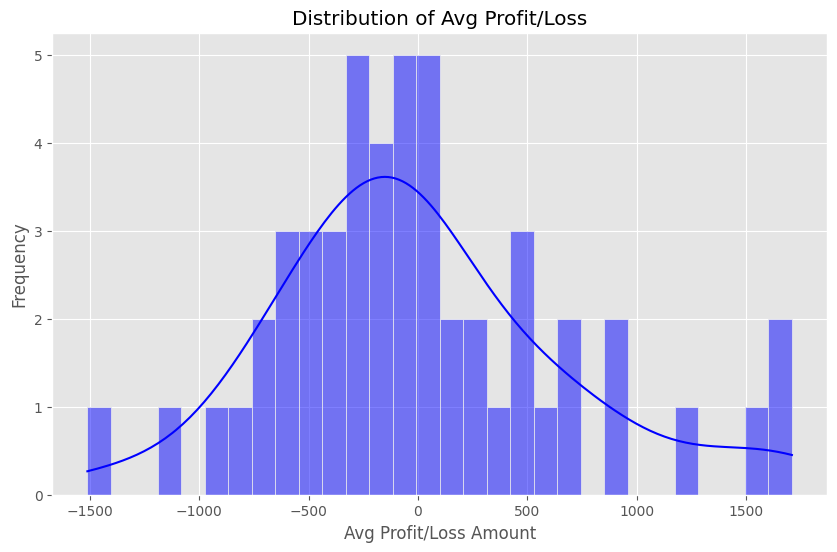

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg Profit/Loss'], bins=30, kde=True, color='blue')  # Plotting the distribution of Avg Profit/Loss
plt.title('Distribution of Avg Profit/Loss')
plt.xlabel('Avg Profit/Loss Amount')
plt.ylabel('Frequency')
plt.show()

## ===========                    Bivariate Analysis                    ==============

### Correlation Matrix for Numeric Features

In [227]:
correlation_cols = ['Avg Gross', 'Total Gross', 'Avg Profit/Loss', 'Total Profit/Loss', 'Avg Miles', 'Total Miles', 'Avg Fuel Efficiency', 
                    'Avg Work Days', 'Performance Score']
correlation_matrix = df[correlation_cols].corr()   # Calculate the correlation matrix
print('===== Pearson Correlation Matrix ======')
print(correlation_matrix)

===== Pearson Correlation Matrix ======
                     Avg Gross  Total Gross  Avg Profit/Loss  \
Avg Gross             1.000000     0.616521         0.725056   
Total Gross           0.616521     1.000000         0.297192   
Avg Profit/Loss       0.725056     0.297192         1.000000   
Total Profit/Loss     0.594315     0.328678         0.884408   
Avg Miles             0.932757     0.603281         0.477656   
Total Miles           0.597165     0.988112         0.213137   
Avg Fuel Efficiency  -0.624331    -0.281490        -0.500116   
Avg Work Days         0.887631     0.601266         0.485861   
Performance Score     0.602189     0.255233         0.862633   

                     Total Profit/Loss  Avg Miles  Total Miles  \
Avg Gross                     0.594315   0.932757     0.597165   
Total Gross                   0.328678   0.603281     0.988112   
Avg Profit/Loss               0.884408   0.477656     0.213137   
Total Profit/Loss             1.000000   0.347436     0

#### Heatmap of the correlation matrix

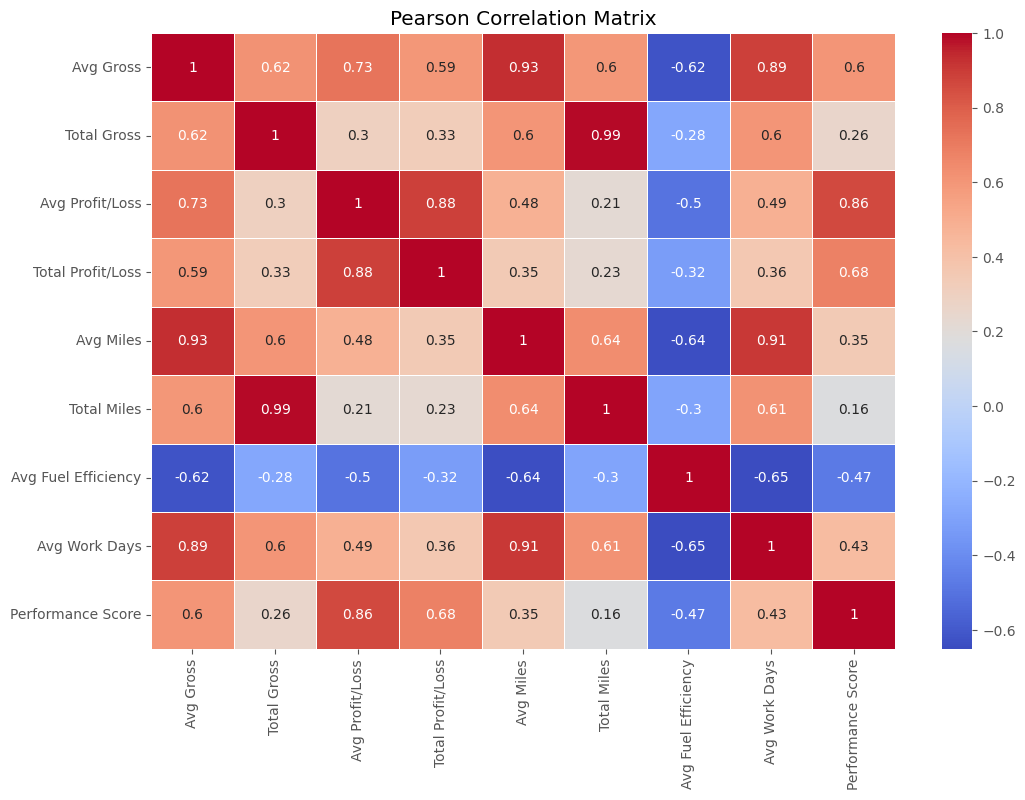

In [229]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)  # Heatmap of the correlation matrix
plt.title('Pearson Correlation Matrix')
plt.show()

#### Relationship between Avg Profit/Loss and Avg Miles

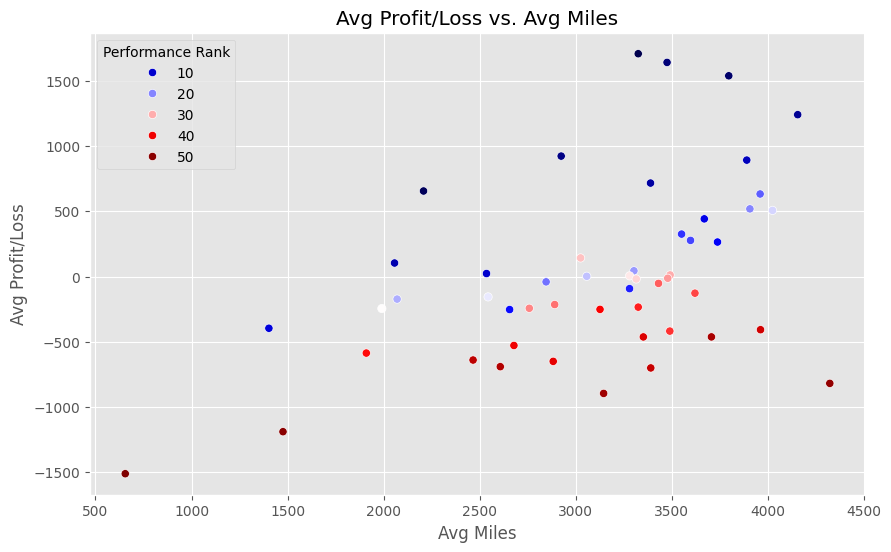

In [143]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg Miles', y='Avg Profit/Loss', data=df, hue='Performance Rank', palette='seismic')  # Scatter plot
plt.title('Avg Profit/Loss vs. Avg Miles')
plt.xlabel('Avg Miles')
plt.ylabel('Avg Profit/Loss')
plt.show()

#### Best-Fit Line

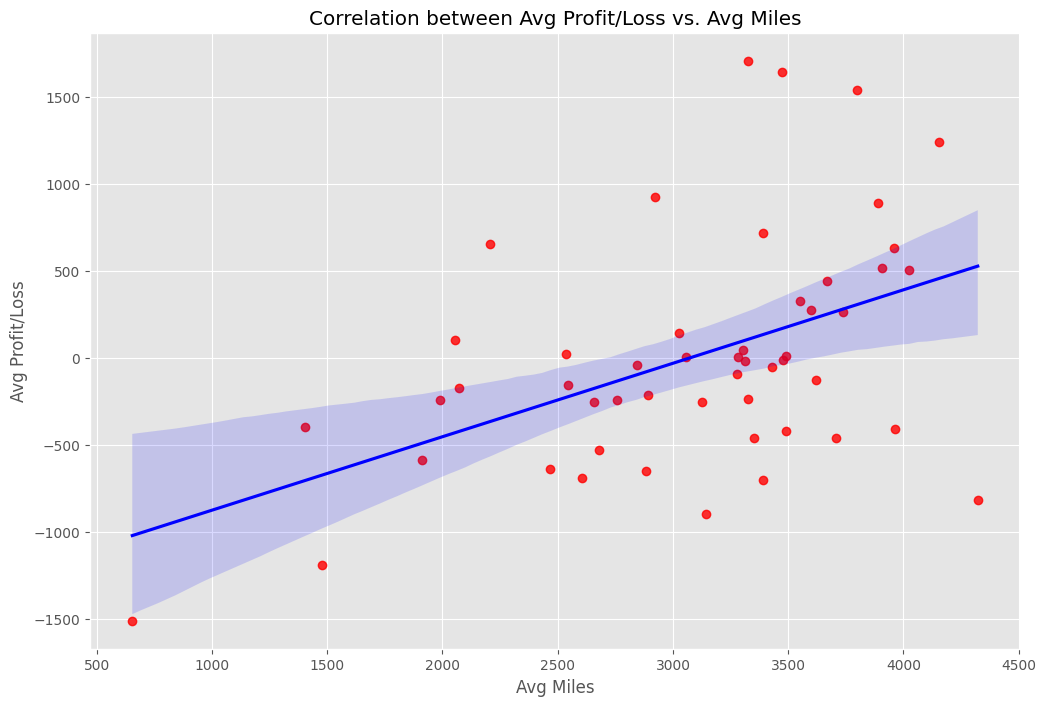

In [195]:
sns.regplot(x="Avg Miles", y="Avg Profit/Loss", data=df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
plt.title('Correlation between Avg Profit/Loss vs. Avg Miles')
plt.xlabel('Avg Miles')
plt.ylabel('Avg Profit/Loss')
plt.show()

#### Relationship between Avg Profit/Loss and Avg Fuel Efficiency

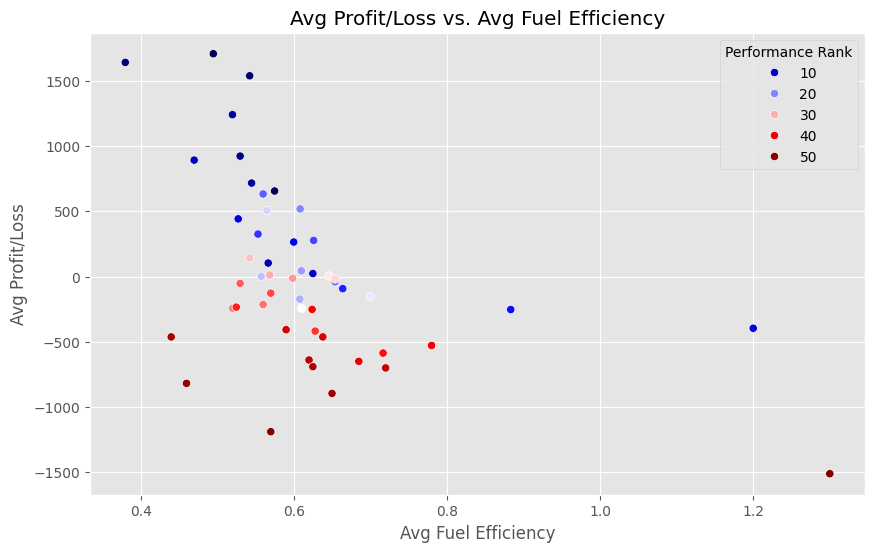

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg Fuel Efficiency', y='Avg Profit/Loss', data=df, hue='Performance Rank', palette='seismic')  # Scatter plot
plt.title('Avg Profit/Loss vs. Avg Fuel Efficiency')
plt.xlabel('Avg Fuel Efficiency')
plt.ylabel('Avg Profit/Loss')
plt.show()

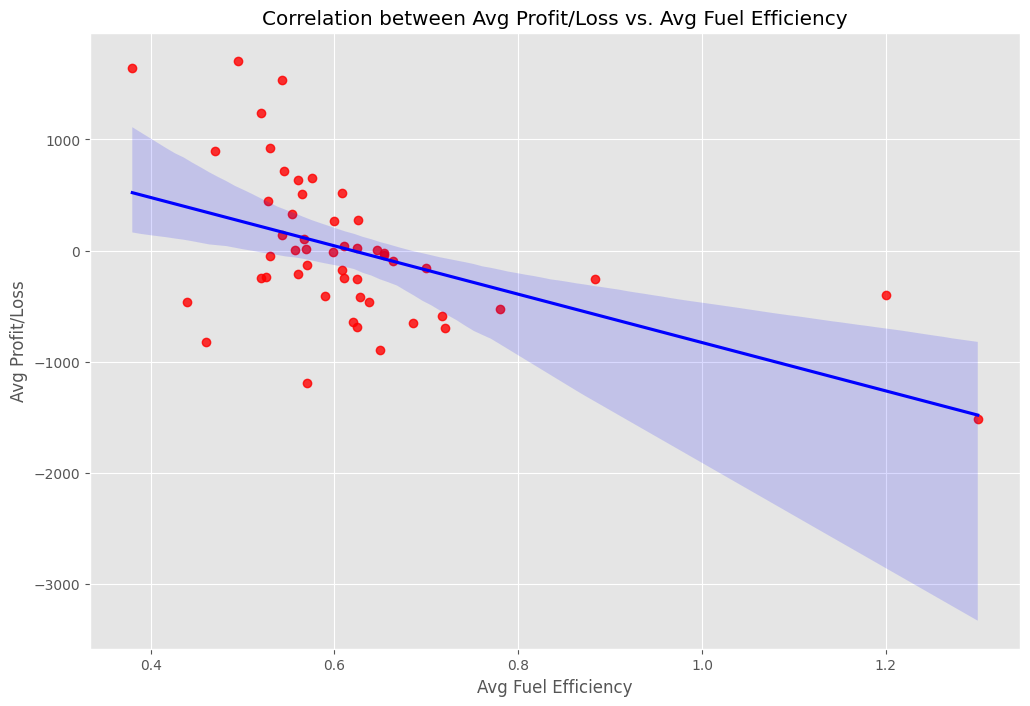

In [205]:
sns.regplot(x="Avg Fuel Efficiency", y="Avg Profit/Loss", data=df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
plt.title('Correlation between Avg Profit/Loss vs. Avg Fuel Efficiency')
plt.xlabel('Avg Fuel Efficiency')
plt.ylabel('Avg Profit/Loss')
plt.show()

In [219]:
# Compute the Kendall correlation matrix
correlation_matrix = df[correlation_cols].corr(method='kendall')

# Print the correlation matrix
print('===== Kendall Correlation Matrix ======')
print(correlation_matrix)

===== Kendall Correlation Matrix ======
                     Avg Gross  Total Gross  Avg Profit/Loss  \
Avg Gross             1.000000     0.499019         0.517850   
Total Gross           0.499019     1.000000         0.261176   
Avg Profit/Loss       0.517850     0.261176         1.000000   
Total Profit/Loss     0.475481     0.225098         0.847843   
Avg Miles             0.762652     0.416471         0.311373   
Total Miles           0.437819     0.901176         0.187451   
Avg Fuel Efficiency  -0.344476    -0.065252        -0.404875   
Avg Work Days         0.667186     0.414509         0.295156   
Performance Score     0.323264     0.151373         0.717647   

                     Total Profit/Loss  Avg Miles  Total Miles  \
Avg Gross                     0.475481   0.762652     0.437819   
Total Gross                   0.225098   0.416471     0.901176   
Avg Profit/Loss               0.847843   0.311373     0.187451   
Total Profit/Loss             1.000000   0.281569     0

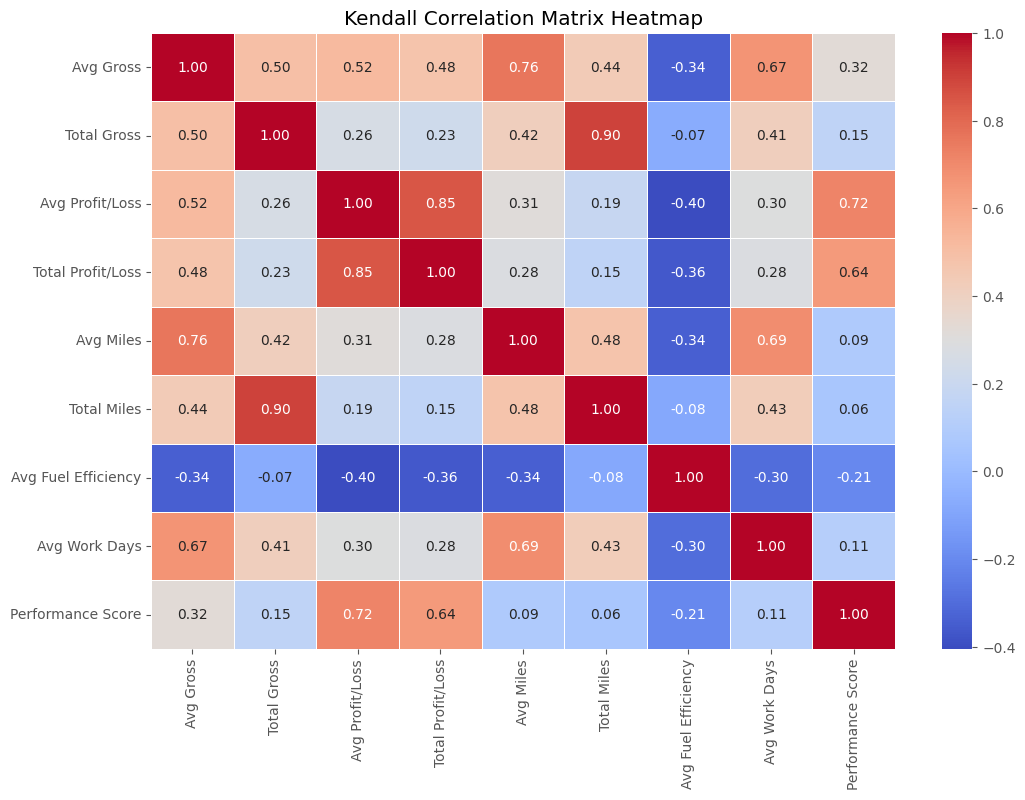

In [221]:
# Create a heatmap visualization
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Kendall Correlation Matrix Heatmap")

# Show the plot
plt.show()

In [223]:
# Compute the Spearman correlation matrix
correlation_matrix = df[correlation_cols].corr(method='spearman')

# Print the correlation matrix
print('===== Spearman Correlation Matrix ======')
print(correlation_matrix)

===== Spearman Correlation Matrix ======
                     Avg Gross  Total Gross  Avg Profit/Loss  \
Avg Gross             1.000000     0.633363         0.685310   
Total Gross           0.633363     1.000000         0.371312   
Avg Profit/Loss       0.685310     0.371312         1.000000   
Total Profit/Loss     0.658431     0.345158         0.959367   
Avg Miles             0.901423     0.571041         0.419367   
Total Miles           0.598837     0.973213         0.271222   
Avg Fuel Efficiency  -0.490440    -0.084627        -0.528714   
Avg Work Days         0.827571     0.573560         0.391320   
Performance Score     0.442589     0.201267         0.874842   

                     Total Profit/Loss  Avg Miles  Total Miles  \
Avg Gross                     0.658431   0.901423     0.598837   
Total Gross                   0.345158   0.571041     0.973213   
Avg Profit/Loss               0.959367   0.419367     0.271222   
Total Profit/Loss             1.000000   0.402262     

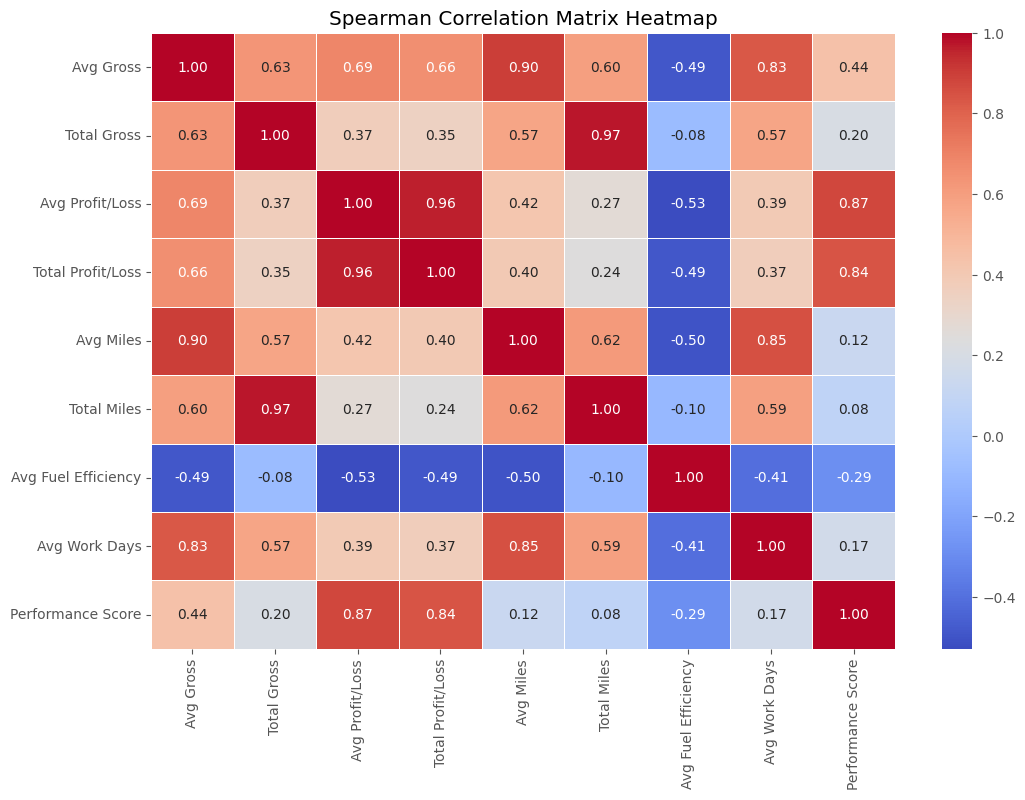

In [225]:
# Create a heatmap visualization
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Spearman Correlation Matrix Heatmap")

# Show the plot
plt.show()

#### Unstacking Variables

In [243]:

# Factorize categorical variables and compute the correlation
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr(method = 'pearson')

# Unstack the matrix to create pairs
corr_pairs = correlation_mat.unstack()

# Remove duplicate pairs and self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Sort correlations by absolute value (optional)
corr_pairs = corr_pairs.abs().sort_values(ascending=False)

# Print the cleaned correlation pairs
print(corr_pairs)


Performance Rank     Performance Score      1.000000
Avg Miles            Total Profit/Loss      1.000000
Total Miles          Avg Miles              1.000000
                     Total Profit/Loss      1.000000
                     Avg Profit/Loss        1.000000
                                              ...   
Avg Work Days        Avg Gross              0.318949
                     Avg Fuel Efficiency    0.234719
Avg Fuel Efficiency  Avg Work Days          0.234719
Driver ID            Avg Work Days          0.233716
Avg Work Days        Driver ID              0.233716
Length: 182, dtype: float64


In [262]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

Total Work Days      Avg Fuel Efficiency    0.519998
Avg Fuel Efficiency  Total Work Days        0.519998
Total Work Days      Avg Gross              0.536931
Avg Gross            Total Work Days        0.536931
Avg Miles            Total Work Days        0.545589
                                              ...   
Avg Profit/Loss      Total Driver Pay       1.000000
Total Gross          Performance Rank       1.000000
                     Total Profit/Loss      1.000000
Total Driver Pay     Total Gross            1.000000
Performance Rank     Performance Score      1.000000
Length: 154, dtype: float64


### =========================================